<a href="https://colab.research.google.com/github/manmal021/CPSMA3933_Labs_Manish/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Programming Assignment

Given the system of inequalities below, determine the shape of the feasible region and find the vertices of the feasible region. Give the shape as "triangle", "quadrilateral", or "unbounded". Report your vertices starting with the one which has the smallest 𝑥
-value. If more than one vertex has the same, smallest 𝑥
-value, start with the one that has the smallest 𝑦
-value. Proceed clockwise from the first vertex. Leave any unnecessary answer spaces blank.

𝑥+𝑦≤9
4𝑥+𝑦≤11
𝑥≥0
𝑦≥0



In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [47]:
# Objective function: Maximize Z = 3x + 2y
c = [-3, -2]  # minimize -Z in linprog

# Constraints Ax <= b
A = [
    [1, 1],    # x + y <= 9
    [4, 1]     # 4x + y <= 11
]
b = [9, 11]

# Variable bounds
bounds = [(0, None), (0, None)]  # x>=0, y>=0


###Step 1: Solve using linprog

In [48]:
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
x_opt, y_opt = res.x
Z_opt = -res.fun

print("----- Using linprog -----")
print(f"Optimal solution: x = {x_opt:.3f}, y = {y_opt:.3f}")
print(f"Maximum Z = {Z_opt:.3f}\n")


----- Using linprog -----
Optimal solution: x = 0.667, y = 8.333
Maximum Z = 18.667



#### Step 2: Find corner points manually (without slack)

In [49]:
vertices = []

# Origin
vertices.append((0,0))

# Intersection with axes
vertices.append((0,9))          # x=0 on x+y=9
vertices.append((2.75,0))       # y=0 on 4x+y=11

# Intersection of x+y=9 and 4x+y=11
x_int = 2/3
y_int = 25/3
vertices.append((x_int, y_int))

# Evaluate Z at vertices
print("----- Corner points (without slack) -----")
print("Vertex (x, y)  Z")
for v in vertices:
    Z = 3*v[0] + 2*v[1]
    print(f"({v[0]:.3f}, {v[1]:.3f})   {Z:.3f}")

# Optimal among vertices
Z_values = [3*v[0] + 2*v[1] for v in vertices]
max_idx = np.argmax(Z_values)
print(f"Optimal corner (without slack): {vertices[max_idx]}  Z = {Z_values[max_idx]:.3f}\n")

----- Corner points (without slack) -----
Vertex (x, y)  Z
(0.000, 0.000)   0.000
(0.000, 9.000)   18.000
(2.750, 0.000)   8.250
(0.667, 8.333)   18.667
Optimal corner (without slack): (0.6666666666666666, 8.333333333333334)  Z = 18.667



### Step 3: Introduce slack variables

In [50]:
# Slack: s1 = 9 - (x+y), s2 = 11 - (4x+y)
print("----- Corner points (with slack) -----")
print("Vertex (x, y, s1, s2)  Z")
for v in vertices:
    x, y = v
    s1 = 9 - (x + y)
    s2 = 11 - (4*x + y)
    Z = 3*x + 2*y
    print(f"({x:.3f}, {y:.3f}, {s1:.3f}, {s2:.3f})   {Z:.3f}")

----- Corner points (with slack) -----
Vertex (x, y, s1, s2)  Z
(0.000, 0.000, 9.000, 11.000)   0.000
(0.000, 9.000, 0.000, 2.000)   18.000
(2.750, 0.000, 6.250, 0.000)   8.250
(0.667, 8.333, 0.000, 0.000)   18.667


#### Step 4: Plot feasible region

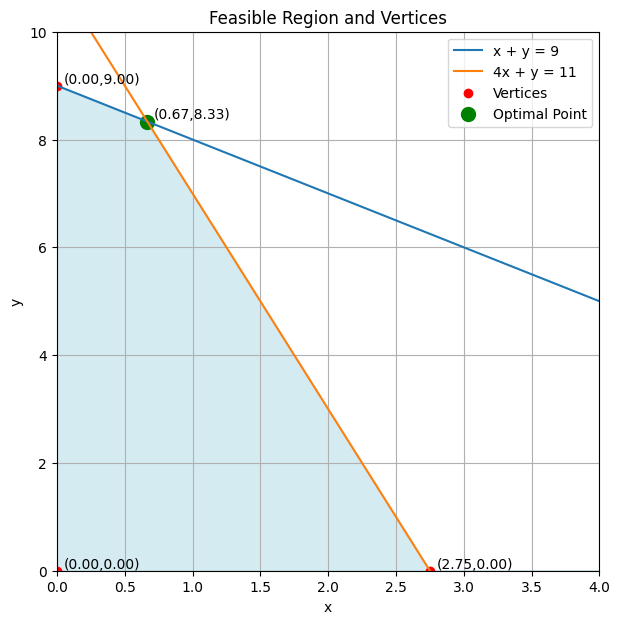

In [51]:
x = np.linspace(0, 4, 400)
y1 = 9 - x
y2 = 11 - 4*x

plt.figure(figsize=(7,7))
plt.plot(x, y1, label="x + y = 9")
plt.plot(x, y2, label="4x + y = 11")
plt.fill_between(x, 0, np.minimum(y1, y2), color='lightblue', alpha=0.5)

# Plot vertices
vertices_arr = np.array(vertices)
plt.scatter(vertices_arr[:,0], vertices_arr[:,1], color='red', label='Vertices')
for i, (vx, vy) in enumerate(vertices):
    plt.text(vx+0.05, vy+0.05, f"({vx:.2f},{vy:.2f})")

# Highlight optimal
plt.scatter(x_opt, y_opt, color='green', s=100, label='Optimal Point')
plt.title("Feasible Region and Vertices")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0,4)
plt.ylim(0,10)
plt.grid(True)
plt.legend()
plt.show()


#QUESTION 2

A company manufactures two models of snowboards, standard and deluxe. Each deluxe model requires 28 hours to produce, and 60 units of material. Each standard model requires 14 hours to produce and 50 units of material. The company has 1022 production hours available and 2690 units of material in stock. The deluxe model sells for 320 and the standard model sells for $200.

What amount of each model should be produced and sold to obtain the maximum revenue?


 deluxe models

 standard models

What is the maximum revenue? $




In [41]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt




####Maximize revenue: R = 320x + 200y
#### Constraints:
#### 28x + 14y <= 1022 (Time)
#### 60x + 50y <= 2690 (Material)
#### x >= 0, y >= 0

In [40]:

# Objective function (minimize negative for linprog)
c = [-320, -200]

# Constraint coefficients
A = [
    [28, 14],  # Time
    [60, 50]   # Material
]
b = [1022, 2690]

# Variable bounds
x_bounds = (0, None)
y_bounds = (0, None)

###2. Solve using LP solver

In [42]:

res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

print("Optimal Solution (x=deluxe, y=standard):", res.x)
print("Maximum Revenue:", -res.fun)


Optimal Solution (x=deluxe, y=standard): [24. 25.]
Maximum Revenue: 12680.0


### 3. Slack variables

In [43]:
x_opt, y_opt = res.x
s1 = 1022 - (28*x_opt + 14*y_opt)  # Time slack
s2 = 2690 - (60*x_opt + 50*y_opt)  # Material slack

print("Slack Time (unused hours):", s1)
print("Slack Material (unused units):", s2)

Slack Time (unused hours): 0.0
Slack Material (unused units): 0.0


#### 4. Graph feasible region

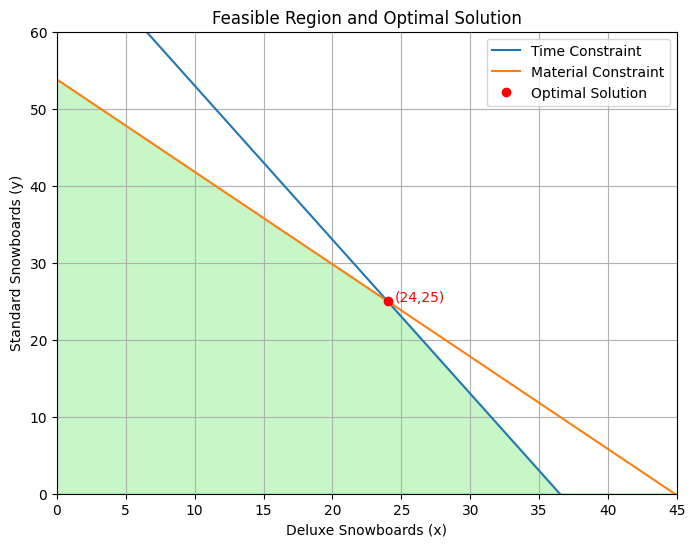

In [44]:

# Create x values
x_vals = np.linspace(0, 50, 200)

# Constraints lines
y_time = (1022 - 28*x_vals) / 14
y_material = (2690 - 60*x_vals) / 50

plt.figure(figsize=(8,6))
plt.plot(x_vals, y_time, label="Time Constraint")
plt.plot(x_vals, y_material, label="Material Constraint")

# Fill feasible region
y_feasible = np.minimum(y_time, y_material)
plt.fill_between(x_vals, 0, y_feasible, color='lightgreen', alpha=0.5)

# Plot optimal point
plt.plot(x_opt, y_opt, 'ro', label="Optimal Solution")
plt.text(x_opt+0.5, y_opt, f'({x_opt:.0f},{y_opt:.0f})', color='red')

plt.xlim(0, 45)
plt.ylim(0, 60)
plt.xlabel("Deluxe Snowboards (x)")
plt.ylabel("Standard Snowboards (y)")
plt.title("Feasible Region and Optimal Solution")
plt.legend()
plt.grid(True)
plt.show()
